In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns; sns.set()
from datetime import datetime
import calendar
import os
from os import listdir
from os.path import isfile, join

pd.set_option('display.max_rows', 6000)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

data_dir = '../../data/esus/'

data_raw_dir = '/home/luizcelso/PycharmProjects/central_covid/dados/eSUS-VE/'

data_raw_mun = '../../../data/'

## Lê dados processados do eSUS-VE

In [2]:
# df_orig = pd.read_csv(data_dir + 'todos_registros_esus-ve.csv')
df_orig = pd.read_csv(data_dir + 'registros_cidades_maiores_esus-ve.csv')

df_orig.loc[df_orig['idade'] > 110, 'idade'] = np.nan

df_orig

municipioIBGE dataNotificacao dataInicioSintomas                 tipoTeste  idade resultadoTeste classificacaoFinal arquivo fonte            Name  estimated_population_2019
0            1100205.0      2020-04-15         2020-04-10                       NaN   27.0            NaN                NaN            sp  Porto Velho-RO                   529544.0
1            1100205.0      2020-04-25         2020-04-16                       NaN   33.0            NaN                NaN            sp  Porto Velho-RO                   529544.0
2            1100205.0      2020-04-24         2020-04-22                       NaN   31.0            NaN                NaN            sp  Porto Velho-RO                   529544.0
3            1100205.0      2020-05-29         2020-04-28                    RT-PCR   43.0       Negativo         Descartado            sp  Porto Velho-RO                   529544.0
4            1100205.0      2020-05-12         2020-05-03  TESTE RÁPIDO - ANTICORPO   25.0       Negativo         Descartado            sp  Porto Velho-RO                   529544.0
...                ...             ...                ...                       ...    ...            ...                ...           ...             ...                        ...
8948722      5300108.0      2020-10-06         2020-09-26                    RT-PCR   53.0       Negativo                NaN            to     Brasília-DF                  3015268.0
8948723      5300108.0      2020-09-30         2020-09-28  TESTE RÁPIDO - ANTICORPO   35.0       Negativo         Descartado            to     Brasília-DF                  3015268.0
8948724      5300108.0      2020-09-28         2020-09-28                    RT-PCR   36.0       Negativo         Descartado            to     Brasília-DF                  3015268.0
8948725      5300108.0      2020-10-08         2020-10-01  TESTE RÁPIDO - ANTICORPO   54.0       Negativo                NaN            to     Brasília-DF                  3015268.0
8948726      5300108.0      2020-10-09         2020-10-02  TESTE RÁPIDO - ANTICORPO   39.0            NaN                NaN            to     Brasília-DF                  3015268.0

[8948727 rows x 10 columns]

In [3]:
df_orig.dtypes

municipioIBGE                float64
dataNotificacao               object
dataInicioSintomas            object
tipoTeste                     object
idade                        float64
resultadoTeste                object
classificacaoFinal            object
arquivo fonte                 object
Name                          object
estimated_population_2019    float64
dtype: object

In [5]:
df_temp = df_orig.query("Name == 'Curitiba-PR'")

df_temp.tail(5000)

municipioNotificacaoIBGE dataNotificacao dataInicioSintomas                      tipoTeste  idade resultadoTeste                 classificacaoFinal         Name  estimated_population_2019
7567666                 4106902.0      2020-09-01                NaN       TESTE RÁPIDO - ANTICORPO   24.0       Negativo                                NaN  Curitiba-PR                  1933105.0
7567667                 4106902.0      2020-09-01         2020-08-23       TESTE RÁPIDO - ANTICORPO   42.0       Negativo                                NaN  Curitiba-PR                  1933105.0
7567668                 4106902.0      2020-09-01                NaN       TESTE RÁPIDO - ANTICORPO   30.0       Negativo                                NaN  Curitiba-PR                  1933105.0
7567669                 4106902.0      2020-09-01         2020-08-23       TESTE RÁPIDO - ANTICORPO   37.0       Negativo                                NaN  Curitiba-PR                  1933105.0
7567670                 4106902.0      2020-09-01                NaN       TESTE RÁPIDO - ANTICORPO   57.0       Negativo                                NaN  Curitiba-PR                  1933105.0
7567671                 4106902.0      2020-09-01                NaN       TESTE RÁPIDO - ANTICORPO   14.0       Negativo                                NaN  Curitiba-PR                  1933105.0
7567672                 4106902.0      2020-09-01                NaN       TESTE RÁPIDO - ANTICORPO   36.0       Negativo                                NaN  Curitiba-PR                  1933105.0
7567673                 4106902.0      2020-09-02                NaN       TESTE RÁPIDO - ANTICORPO   46.0       Negativo                                NaN  Curitiba-PR                  1933105.0
7567674                 4106902.0      2020-09-02                NaN       TESTE RÁPIDO - ANTICORPO   37.0       Negativo                                NaN  Curitiba-PR                  1933105.0
7567675                 4106902.0      2020-09-02                NaN       TESTE RÁPIDO - ANTICORPO   35.0       Negativo                                NaN  Curitiba-PR                  1933105.0
7567676                 4106902.0      2020-09-02                NaN       TESTE RÁPIDO - ANTICORPO   50.0       Positivo                                NaN  Curitiba-PR                  1933105.0
7567677                 4106902.0      2020-09-02                NaN       TESTE RÁPIDO - ANTICORPO   41.0       Negativo                                NaN  Curitiba-PR                  1933105.0
7567678                 4106902.0      2020-09-02                NaN       TESTE RÁPIDO - ANTICORPO   42.0       Negativo                                NaN  Curitiba-PR                  1933105.0
7567679                 4106902.0      2020-09-02                NaN       TESTE RÁPIDO - ANTICORPO   36.0       Negativo                                NaN  Curitiba-PR                  1933105.0
7567680                 4106902.0      2020-09-02                NaN       TESTE RÁPIDO - ANTICORPO   22.0       Positivo                                NaN  Curitiba-PR                  1933105.0
7567681                 4106902.0      2020-09-02                NaN       TESTE RÁPIDO - ANTICORPO   64.0       Negativo                                NaN  Curitiba-PR                  1933105.0
7567682                 4106902.0      2020-09-02                NaN       TESTE RÁPIDO - ANTICORPO   46.0       Negativo                                NaN  Curitiba-PR                  1933105.0
7567683                 4106902.0      2020-09-02                NaN       TESTE RÁPIDO - ANTICORPO   36.0       Negativo                                NaN  Curitiba-PR                  1933105.0
7567684                 4106902.0      2020-09-02                NaN       TESTE RÁPIDO - ANTICORPO   36.0       Negativo                                NaN  Curitiba-PR                  1933105.0
7567685                 4106902.0      2020-09-02                NaN 

In [4]:
pd.crosstab(df_temp['classificacaoFinal'], df_temp['resultadoTeste'], margins=True)

resultadoTeste                     Inconclusivo ou Indeterminado  Negativo  Positivo     All
classificacaoFinal                                                                          
Confirmado Clínico-Epidemiológico                              0        42       147     189
Confirmado Clínico-Imagem                                      0        39        12      51
Confirmado Laboratorial                                        0      3000     23040   26040
Confirmado por Critério Clínico                                0         9         4      13
Confirmação Laboratorial                                       0         0        30      30
Descartado                                                     2     84062       167   84231
Síndrome Gripal Não Especificada                               2     11136       130   11268
All                                                            4     98288     23530  121822

In [5]:
df_temp.groupby('tipoTeste').count()

municipioNotificacaoIBGE  dataNotificacao  dataInicioSintomas   idade  resultadoTeste  classificacaoFinal    Name  estimated_population_2019
tipoTeste                                                                                                                                                                                       
Enzimaimunoensaio  ELISA                                                  6                6                   4       6               6                   2       6                          6
Enzimaimunoensaio - ELISA IgM                                             65               65                  55      65              65                  20      65                         65
Imunoensaio por Eletroquimioluminescência  ECLIA                          4                4                   4       4               4                   4       4                          4
Imunoensaio por Eletroquimioluminescência - ECL...                        32               32                  28      32              32                  20      32                         32
Quimioluminescência - CLIA                                                 4                4                   4       4               4                   4       4                          4
RT-PCR                                                                  5887             5887                4769    5885            5545                2892    5887                       5887
TESTE RÁPIDO - ANTICORPO                                              769801           769801              141671  761925          769783              118483  769801                     769801
TESTE RÁPIDO - ANTÍGENO                                                  395              395                 269     395             395                 174     395                        395

In [6]:
df_temp.groupby('idade').count()

municipioNotificacaoIBGE  dataNotificacao  dataInicioSintomas  tipoTeste  resultadoTeste  classificacaoFinal   Name  estimated_population_2019
idade                                                                                                                                                
0.0                        1035             1035                 409        970             972                 131   1035                       1035
1.0                        1713             1713                 444       1692            1693                 339   1713                       1713
2.0                        1865             1865                 346       1837            1839                 399   1865                       1865
3.0                        1790             1790                 306       1765            1765                 353   1790                       1790
4.0                        1984             1984                 321       1964            1966                 398   1984                       1984
5.0                        1940             1940                 327       1912            1914                 403   1940                       1940
6.0                        2075             2075                 309       2053            2054                 441   2075                       2075
7.0                        2104             2104                 294       2080            2081                 468   2104                       2104
8.0                        2129             2129                 320       2113            2113                 419   2129                       2129
9.0                        2179             2179                 304       2150            2151                 474   2179                       2179
10.0                       2273             2273                 356       2264            2265                 498   2273                       2273
11.0                       2200             2200                 327       2184            2186                 430   2200                       2200
12.0                       2296             2296                 396       2275            2276                 409   2296                       2296
13.0                       2423             2423                 439       2404            2405                 497   2423                       2423
14.0                       2800             2800                 518       2774            2773                 489   2800                       2800
15.0                       3260             3260                 572       3225            3226                 624   3260                       3260
16.0                       4386             4386                 673       4357            4359                 704   4386                       4386
17.0                       5312             5312                 772       5276            5273                 748   5312                       5312
18.0                       5833             5833                1072       5785            5788                 859   5833                       5833
19.0                       6929             6929                1610       6843            6840                 974   6929                       6929
20.0                       9018             9018                2065       8904            8902                1333   9018                       9018
21.0                       9724             9724                2246       9582            9585                1483   9724                       9724
22.0                      10895            10895                2379      10743           10746                1623  10895                      10895
23.0                      11871            11871                2667      11666           11668                1825  11871                      11871
24.0                      12910            12910                2808      12736           12736            

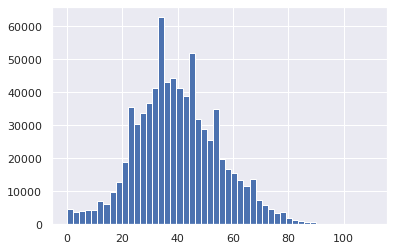

In [7]:
df_temp['idade'].hist(bins=50)

/home/luizcelso/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 19 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/luizcelso/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 19 missing from current font.
  font.set_text(s, 0, flags=flags)


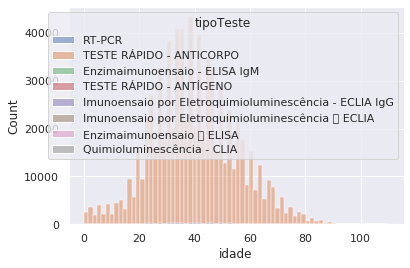

In [8]:
sns.histplot(df_temp, x="idade",  hue="tipoTeste", bins=70)

In [9]:
df_orig['municipioNotificacaoIBGE'].isna().sum()

0

In [10]:
pd.crosstab(df_orig['classificacaoFinal'], df_orig['resultadoTeste'], margins=True)

resultadoTeste                     Inconclusivo ou Indeterminado  Negativo  Positivo      All
classificacaoFinal                                                                           
Confirmado Clínico-Epidemiológico                             91      5648     11572    17311
Confirmado Clínico-Imagem                                      3       272       345      620
Confirmado Laboratorial                                      233     73855   1372782  1446870
Confirmado por Critério Clínico                               29      3264       899     4192
Confirmação Laboratorial                                       0         0       432      432
Descartado                                                   464   1452441      7532  1460437
Sindrome Gripal Nao Especificada                               0         0         2        2
Síndrome Gripal Não Especificada                             565    121981      1259   123805
All                                                         1385   1657461   1394823  3053669

In [11]:
df_orig['classificacaoFinal'].unique()

array([nan, 'Descartado', 'Confirmado Laboratorial',
       'Síndrome Gripal Não Especificada',
       'Confirmado Clínico-Epidemiológico',
       'Confirmado por Critério Clínico', 'Confirmado Clínico-Imagem',
       'Confirmação Laboratorial', 'Sindrome Gripal Nao Especificada'],
      dtype=object)

In [12]:
df_orig['tipoTeste'].unique()

array([nan, 'RT-PCR', 'TESTE RÁPIDO - ANTICORPO',
       'TESTE RÁPIDO - ANTÍGENO', 'Enzimaimunoensaio - ELISA IgM',
       'Quimioluminescência - CLIA',
       'Imunoensaio por Eletroquimioluminescência - ECLIA IgG',
       'Enzimaimunoensaio \x13 ELISA',
       'Imunoensaio por Eletroquimioluminescência \x13 ECLIA'],
      dtype=object)

In [13]:
df_orig['resultadoTeste'].unique()

array([nan, 'Negativo', 'Positivo', 'Inconclusivo ou Indeterminado'],
      dtype=object)

In [14]:
confirmados = ['Confirmado Laboratorial',
       'Confirmado Clínico-Epidemiológico',
       'Confirmado Clínico-Imagem',
       'Confirmação Laboratorial', 'Confirmado por Critério Clínico',
       'Confirmação Clínico Epidemiológico',
       'Confirmado Clinico-Imagem',
       'Confirmado Clinico-Epidemiologico']

In [15]:
df_orig.columns

Index(['municipioNotificacaoIBGE', 'dataNotificacao', 'dataInicioSintomas', 'tipoTeste', 'idade', 'resultadoTeste', 'classificacaoFinal', 'Name', 'estimated_population_2019'], dtype='object')

In [16]:
mun_list = ['Rio Branco-AC', 'Maceió-AL', 'Macapá-AP', 'Manaus-AM',
       'Salvador-BA', 'Fortaleza-CE', 'Brasília-DF', 'Vitória-ES',
       'Goiânia-GO', 'São Luís-MA', 'Cuiabá-MT', 'Campo Grande-MS',
       'Belo Horizonte-MG', 'Curitiba-PR', 'João Pessoa-PB', 'Belém-PA',
       'Recife-PE', 'Teresina-PI', 'Rio de Janeiro-RJ', 'Natal-RN',
       'Porto Alegre-RS', 'Porto Velho-RO', 'Boa Vista-RR',
       'Florianópolis-SC', 'Aracaju-SE', 'São Paulo-SP', 'Palmas-TO']


# mun_list = ['Rio Branco-AC', 'Maceió-AL', 'Macapá-AP', 'Manaus-AM',
#        'Salvador-BA', 'Fortaleza-CE', 'Brasília-DF', 'Vitória-ES',
#        'Goiânia-GO', 'São Luis-MA', 'Cuiabá-MT', 'Campo Grande-MS',
#        'Belo Horizonte-MG', 'Curitiba-PR', 'João Pessoa-PB', 'Belém-PA',
#        'Recife-PE', 'Teresina-PI', 'Natal-RN',
#        'Porto Alegre-RS', 'Porto Velho-RO', 'Boa Vista-RR',
#        'Florianópolis-SC', 'Aracaju-SE', 'Palmas-TO']


In [17]:
df_testes = df_orig[~df_orig['tipoTeste'].isna()]

df_testes = df_testes[df_testes['Name'].isin(mun_list)]

df_testes

municipioNotificacaoIBGE dataNotificacao dataInicioSintomas                 tipoTeste  idade resultadoTeste       classificacaoFinal            Name  estimated_population_2019
4                       1100205.0      2020-05-15         2020-05-11                    RT-PCR   40.0       Negativo                      NaN  Porto Velho-RO                   529544.0
7                       1100205.0      2020-06-08         2020-05-20  TESTE RÁPIDO - ANTICORPO   33.0       Negativo                      NaN  Porto Velho-RO                   529544.0
8                       1100205.0      2020-06-10         2020-05-30  TESTE RÁPIDO - ANTICORPO   19.0       Negativo                      NaN  Porto Velho-RO                   529544.0
10                      1100205.0      2020-06-11         2020-06-06  TESTE RÁPIDO - ANTICORPO   20.0       Negativo                      NaN  Porto Velho-RO                   529544.0
12                      1100205.0      2020-06-11         2020-06-05  TESTE RÁPIDO - ANTICORPO   44.0       Negativo                      NaN  Porto Velho-RO                   529544.0
...                           ...             ...                ...                       ...    ...            ...                      ...             ...                        ...
9451615                 5300108.0      2020-09-23         2020-07-25  TESTE RÁPIDO - ANTICORPO   29.0       Positivo  Confirmado Laboratorial     Brasília-DF                  3015268.0
9451616                 5300108.0      2020-09-23         2020-09-16                    RT-PCR   18.0            NaN                      NaN     Brasília-DF                  3015268.0
9451617                 5300108.0      2020-09-24         2020-09-16  TESTE RÁPIDO - ANTICORPO   29.0       Positivo                      NaN     Brasília-DF                  3015268.0
9451618                 5300108.0      2020-09-24         2020-09-16  TESTE RÁPIDO - ANTICORPO   29.0       Positivo                      NaN     Brasília-DF                  3015268.0
9451619                 5300108.0      2020-09-25         2020-09-23                    RT-PCR   23.0            NaN                      NaN     Brasília-DF                  3015268.0

[3857716 rows x 9 columns]

In [23]:
df_testes.loc[(~df_testes['tipoTeste'].isna()) & (df_testes['tipoTeste'] != 'RT-PCR'), 'Teste'] = 'Outros'

df_testes.loc[df_testes['tipoTeste'] == 'RT-PCR', 'Teste'] = 'RT-PCR'

df_testes

municipioNotificacaoIBGE dataNotificacao dataInicioSintomas                 tipoTeste  idade resultadoTeste       classificacaoFinal            Name  estimated_population_2019   Teste
4                       1100205.0      2020-05-15         2020-05-11                    RT-PCR   40.0       Negativo                      NaN  Porto Velho-RO                   529544.0  RT-PCR
7                       1100205.0      2020-06-08         2020-05-20  TESTE RÁPIDO - ANTICORPO   33.0       Negativo                      NaN  Porto Velho-RO                   529544.0  Outros
8                       1100205.0      2020-06-10         2020-05-30  TESTE RÁPIDO - ANTICORPO   19.0       Negativo                      NaN  Porto Velho-RO                   529544.0  Outros
10                      1100205.0      2020-06-11         2020-06-06  TESTE RÁPIDO - ANTICORPO   20.0       Negativo                      NaN  Porto Velho-RO                   529544.0  Outros
12                      1100205.0      2020-06-11         2020-06-05  TESTE RÁPIDO - ANTICORPO   44.0       Negativo                      NaN  Porto Velho-RO                   529544.0  Outros
...                           ...             ...                ...                       ...    ...            ...                      ...             ...                        ...     ...
9451615                 5300108.0      2020-09-23         2020-07-25  TESTE RÁPIDO - ANTICORPO   29.0       Positivo  Confirmado Laboratorial     Brasília-DF                  3015268.0  Outros
9451616                 5300108.0      2020-09-23         2020-09-16                    RT-PCR   18.0            NaN                      NaN     Brasília-DF                  3015268.0  RT-PCR
9451617                 5300108.0      2020-09-24         2020-09-16  TESTE RÁPIDO - ANTICORPO   29.0       Positivo                      NaN     Brasília-DF                  3015268.0  Outros
9451618                 5300108.0      2020-09-24         2020-09-16  TESTE RÁPIDO - ANTICORPO   29.0       Positivo                      NaN     Brasília-DF                  3015268.0  Outros
9451619                 5300108.0      2020-09-25         2020-09-23                    RT-PCR   23.0            NaN                      NaN     Brasília-DF                  3015268.0  RT-PCR

[3857716 rows x 10 columns]

In [24]:
(df_testes['idade'] == 112).sum()

0

In [25]:
df_testes.query("Name == 'Curitiba-PR'")

municipioNotificacaoIBGE dataNotificacao dataInicioSintomas                 tipoTeste  idade resultadoTeste       classificacaoFinal         Name  estimated_population_2019   Teste
6786383                 4106902.0      2020-05-15         2020-05-06                    RT-PCR   36.0       Positivo  Confirmado Laboratorial  Curitiba-PR                  1933105.0  RT-PCR
6786387                 4106902.0      2020-05-19         2020-05-15                    RT-PCR   44.0       Positivo                      NaN  Curitiba-PR                  1933105.0  RT-PCR
6786391                 4106902.0      2020-05-28         2020-05-28  TESTE RÁPIDO - ANTICORPO   46.0       Negativo                      NaN  Curitiba-PR                  1933105.0  Outros
6786394                 4106902.0      2020-06-02         2020-06-01                    RT-PCR   31.0       Positivo  Confirmado Laboratorial  Curitiba-PR                  1933105.0  RT-PCR
6786395                 4106902.0      2020-06-03         2020-06-02                    RT-PCR   25.0       Negativo               Descartado  Curitiba-PR                  1933105.0  RT-PCR
...                           ...             ...                ...                       ...    ...            ...                      ...          ...                        ...     ...
7572660                 4106902.0      2020-08-27                NaN  TESTE RÁPIDO - ANTICORPO   29.0       Negativo               Descartado  Curitiba-PR                  1933105.0  Outros
7572661                 4106902.0      2020-09-01                NaN  TESTE RÁPIDO - ANTICORPO   61.0       Negativo                      NaN  Curitiba-PR                  1933105.0  Outros
7572662                 4106902.0      2020-09-02                NaN  TESTE RÁPIDO - ANTICORPO   28.0       Negativo                      NaN  Curitiba-PR                  1933105.0  Outros
7572664                 4106902.0      2020-09-18         2020-09-18  TESTE RÁPIDO - ANTICORPO   31.0       Negativo               Descartado  Curitiba-PR                  1933105.0  Outros
7572665                 4106902.0      2020-09-24         2020-09-21                    RT-PCR   36.0            NaN                      NaN  Curitiba-PR                  1933105.0  RT-PCR

[776194 rows x 10 columns]

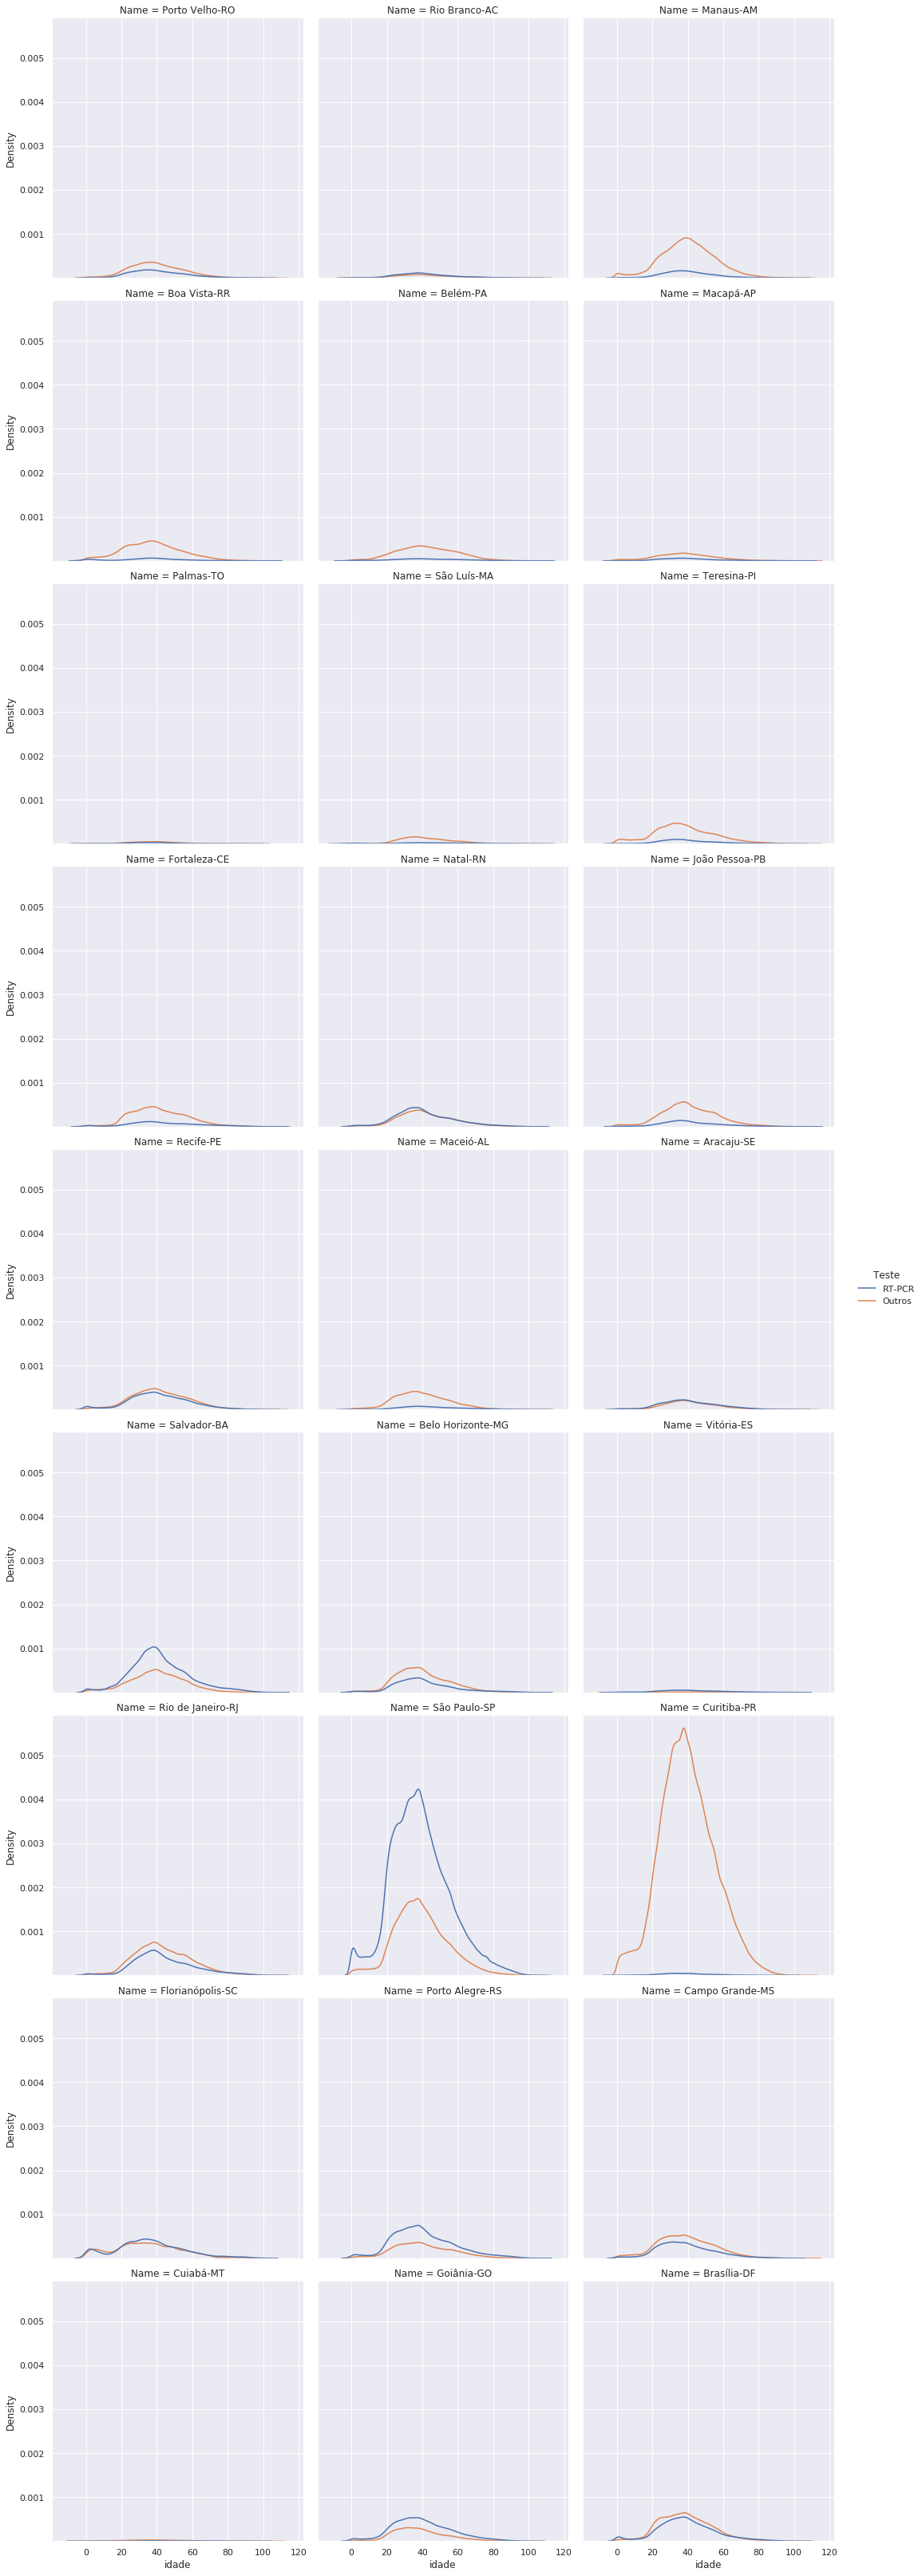

In [26]:
sns.displot(df_testes, x="idade", col="Name", hue="Teste", col_wrap=3, kind="kde")

In [22]:
mun_list = ['Rio Branco-AC', 'Maceió-AL', 'Macapá-AP', 'Manaus-AM',
       'Salvador-BA', 'Fortaleza-CE', 'Brasília-DF', 'Vitória-ES',
       'Goiânia-GO', 'São Luis-MA', 'Cuiabá-MT', 'Campo Grande-MS',
       'Belo Horizonte-MG', 'Curitiba-PR', 'João Pessoa-PB', 'Belém-PA',
       'Recife-PE', 'Teresina-PI', 'Rio de Janeiro-RJ', 'Natal-RN',
       'Porto Alegre-RS', 'Porto Velho-RO', 'Boa Vista-RR',
       'Florianópolis-SC', 'Aracaju-SE', 'São Paulo-SP', 'Palmas-TO']